# **URBANIZATION IN KENYA**

### 1. a)Defining the Question

> We intend to draw insights of how urbanization is impacting different aspects of Kenyan Societies. 

### b) Defining the metric of success

> 1. Accurate determination of how urbanization affected different aspects of the kenyan society.
> 2. Determination of the key kenyan societal aspects affected most by Urbanization.
> 3. Accurate visualizations on urban trends overtime.
> 4. Accurate analysis on how urbanization has affected socio-economic indicators such as GDP per capita, education, and healthcare access.
> 5. Drawing up the upside and downside of urbanization and key areas that need focus.


### c) Understanding the context

> Urbanization in Kenya has surged in recent decades, driven by factors like rural-to-urban migration, population growth, and economic opportunities. Nairobi, the capital, stands as a focal point, drawing people seeking better prospects. This rapid growth presents challenges like housing shortages, traffic congestion, and strained services. However, it also fuels economic development, job creation, and innovation. The government is actively addressing these challenges through infrastructure improvements, affordable housing initiatives, and sustainable urban planning. To fully capitalize on this transformation, effective urban planning and infrastructure development are imperative.

> We intend to dig deeper through our data to try and understand urbanization and its effects better.

### d) Recording the experimental design

1. Data sourcing/loading
2. Data Understanding
3. Data Relevance
4. External Dataset Validation
5. Data Preparation
6. Univariate Analysis
7. Bivariate Analysis
8. Multivariate Analysis
9. Implementing the solution
10. Challenging the solution
11. Conclusion
12. Follow up questions

### e) Data relevance

> The data used has been found to be valid and of kenyan origin and the source accredited 

# 2. Data Understanding

In [250]:
# lets import the libraries we need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder, Normalizer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, f1_score, precision_score, recall_score, classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, ComplementNB, CategoricalNB
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus
import os
import pywedge as pw

# filter to ignore warnings
import warnings
warnings.filterwarnings('ignore')


### a) reading the data

In [251]:
# lets read the dataset into a dataframe
df_2 = pd.read_csv('urbanization-external-data/Population_Distribution_by_Sex_in_Urban_Centres_and_Status_of_Centre__2019.csv')
df_3 = pd.read_csv('urbanization-external-data/Rural_Urban_Population_By_Age_Sex_and_by_District__2019.csv')


### b) Checking the data

Number of records in the datasets

In [252]:
# Number of rows and columns
# df_2 dataset
print(
    f'df_2 dataset: rows = {df_2.shape[0]} and columns = {df_2.shape[1]}')

# df_3 dataset
print(
    f'df_3 dataset: rows = {df_3.shape[0]} and columns = {df_3.shape[1]}')


df_2 dataset: rows = 215 and columns = 16
df_3 dataset: rows = 25420 and columns = 9


> The datasets are big which makes analysis and drawing insights from them accurate

Top view of df_2

In [253]:
# let's preview the top data for the 2nd dataframe
df_2.head(4)

,Urban_Center,District,Status,Core-Urban_Male_Population,Core-Urban_Female_Population,Total_Core-Urban_Population,Peri-Urban_Male_Population,Peri-Urban_Female_Population,Total_Peri-Urban_Population,Rural_Male_Population,Rural_Female_Population,Total_Rural_Population,Total_Male_Population,Total_Female_Population,Total_Population,OBJECTID
0,NAIROBI,Nairobi East/West/North/Westlands,City,1602104,1531414,3133518,NaN,NaN,NaN,NaN,NaN,NaN,1602104,1531414,3133518,0
1,MOMBASA,Mombasa/Kilindini,City,473433,441668,915101,12775.0,10255.0,23030.0,NaN,NaN,NaN,486208,451923,938131,1
2,KISUMU,Kisumu East/West/Nyando,City,131062,128196,259258,62816.0,66237.0,129053.0,10356.0,11261.0,21617.0,204234,205694,409928,2
3,NAKURU,Nakuru/Nakuru North,Municipality,145038,141373,286411,10843.0,10736.0,21579.0,NaN,NaN,NaN,155881,152109,307990,3


> The data looks good so we will proceed to exploration

Top view of df_3

In [254]:
# let's preview the top data for the third dataframe
df_3.head(4)

,District,Urban/Rural,Age_years,Male,Female,Total,County,Province,OBJECTID
0,NAIROBI WEST,Urban,0,10126,10116,20242,Nairobi,NAIROBI,0
1,NAIROBI WEST,Urban,1,8124,7989,16113,Nairobi,NAIROBI,1
2,NAIROBI WEST,Urban,2,8462,8627,17089,Nairobi,NAIROBI,2
3,NAIROBI WEST,Urban,3,8334,8420,16754,Nairobi,NAIROBI,3


> We may need to drop the objectID column to work with the dataset

Bottom view of df_2

In [255]:
# let's preview the bottom data for the third dataframe
df_2.tail(4)

,Urban_Center,District,Status,Core-Urban_Male_Population,Core-Urban_Female_Population,Total_Core-Urban_Population,Peri-Urban_Male_Population,Peri-Urban_Female_Population,Total_Peri-Urban_Population,Rural_Male_Population,Rural_Female_Population,Total_Rural_Population,Total_Male_Population,Total_Female_Population,Total_Population,OBJECTID
211,PORT VICTORIA,Bunyala,Town Council,3101,3460,6561,NaN,NaN,NaN,7337.0,7803.0,15140.0,10438,11263,21701,211
212,OTHAYA,Nyeri South,Town Council,2385,2752,5137,NaN,NaN,NaN,6589.0,7217.0,13806.0,8974,9969,18943,212
213,KAJIADO,Kajiado Central,Town Council,7458,7173,14631,107.0,122.0,229.0,1718.0,1703.0,3421.0,9283,8998,18281,213
214,WOTE,Makueni,Town Council,4887,4988,9875,NaN,NaN,NaN,NaN,NaN,NaN,4887,4988,9875,214


> We have some missing values that we may need to find out whether important then we drop or keep them

Bottom view of df_3

In [256]:
# let's preview the bottom data for the third dataframe
df_3.tail(4)


,District,Urban/Rural,Age_years,Male,Female,Total,County,Province,OBJECTID
25416,TESO SOUTH,Rural,78,63,47,110,Busia,WESTERN,25416
25417,TESO SOUTH,Rural,79,90,121,211,Busia,WESTERN,25417
25418,TESO SOUTH,Rural,80+,384,391,775,Busia,WESTERN,25418
25419,TESO SOUTH,Rural,Age NS,25,23,48,Busia,WESTERN,25419


### c) Checking the Datatypes

In [257]:
# df_2
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Urban_Center                  215 non-null    object 
 1   District                      215 non-null    object 
 2   Status                        215 non-null    object 
 3   Core-Urban_Male_Population    215 non-null    int64  
 4   Core-Urban_Female_Population  215 non-null    int64  
 5   Total_Core-Urban_Population   215 non-null    int64  
 6   Peri-Urban_Male_Population    114 non-null    float64
 7   Peri-Urban_Female_Population  114 non-null    float64
 8   Total_Peri-Urban_Population   114 non-null    float64
 9   Rural_Male_Population         93 non-null     float64
 10  Rural_Female_Population       93 non-null     float64
 11  Total_Rural_Population        93 non-null     float64
 12  Total_Male_Population         215 non-null    int64  
 13  Total

> We have some missing values which we will fill appropriately after deeper analysis, the data types of some columns will also be changed, we will also drop OBJECTID

In [258]:
# df_3
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25420 entries, 0 to 25419
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   District     25420 non-null  object
 1   Urban/Rural  25420 non-null  object
 2   Age_years    25420 non-null  object
 3   Male         25420 non-null  int64 
 4   Female       25420 non-null  int64 
 5   Total        25420 non-null  int64 
 6   County       25420 non-null  object
 7   Province     25420 non-null  object
 8   OBJECTID     25420 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.7+ MB


> There are no missing values, we will change the data type of the age column to int and drop the OBJECTID

# 3. External Data Validation

> The datasets have been derived from driven data therefore proven to be valid for this study as they fall within the scope.

# 4. Data Preparation

### a) Consistency

Here we check for duplicates in our datasets before dropping any column

In [259]:
# lets check for duplicates
# df_2
print(df_2.duplicated().any())

# df_3
print(df_3.duplicated().any())

False
False


> Duplicates are absent in all the datasets

### b) Validation

The county_centroid and OBJECTID columns will be dropped as they are not showing any relevance

In [260]:
# Checking relevance of the county_centroid and objectid columns
print(f"""
for df_2(Distribution by sex and state of centre) \n
Percentage of unique values (df_2): {(len(df_2.OBJECTID.unique()) / df_2.shape[0]) * 100}%

for df_3(Distribution by District) \n
Percentage of unique values (df_3): {(len(df_3.OBJECTID.unique()) / df_3.shape[0]) * 100}%
""")


for df_2(Distribution by sex and state of centre) 

Percentage of unique values (df_2): 100.0%

for df_3(Distribution by District) 

Percentage of unique values (df_3): 100.0%



> As the county_centroid and OBJECTIDs numbers have a high number of unique values, they will be dropped from all the datasets.



In [261]:
# Removing columns that do not add meaning to the project
df_2.drop(['OBJECTID'], axis=1, inplace=True)
df_3.drop(['OBJECTID'], axis=1, inplace=True)


In [262]:
# Ensuring changes have been made

print(f"""
for df_2(Distribution by sex and state of centre) \n
df_2 columns: {len(df_2.columns.values)}

for df_3(Distribution by District) \n
df_3 columns: {len(df_3.columns.values)}
""")


for df_2(Distribution by sex and state of centre) 

df_2 columns: 15

for df_3(Distribution by District) 

df_3 columns: 8



Correcting the names of columns

In [263]:
# lets rename the columns properly: df_2
df_2.columns = df_2.columns.str.replace('-', '_')
df_2.columns

Index(['Urban_Center', 'District', 'Status', 'Core_Urban_Male_Population',
       'Core_Urban_Female_Population', 'Total_Core_Urban_Population',
       'Peri_Urban_Male_Population', 'Peri_Urban_Female_Population',
       'Total_Peri_Urban_Population', 'Rural_Male_Population',
       'Rural_Female_Population', 'Total_Rural_Population',
       'Total_Male_Population', 'Total_Female_Population', 'Total_Population'],
      dtype='object')

> The columns are properly named.

### c) Completeness

Percentage of missing values in the datasets

In [264]:
# Function to find the percentage of missing values
def PercentageMissing(data):
   # percentage of missing values
   for col in data.columns.tolist():
      missing = data[col].isnull().sum()
      if missing > 0:
         print(f'{col} = {round((missing/data.shape[0])*100)}%')

In [265]:
# df_2
PercentageMissing(df_2)

Peri_Urban_Male_Population = 47%
Peri_Urban_Female_Population = 47%
Total_Peri_Urban_Population = 47%
Rural_Male_Population = 57%
Rural_Female_Population = 57%
Total_Rural_Population = 57%


> The dataset has quite a number of missing values, we will however not impute them because they are less than 75% of the total data, and we can also consider the dataset a crucial dataset in this scenario.

In [266]:
# df_3
PercentageMissing(df_3)

> The third dataset has no missing values

Filling the missing values

In [267]:
# Function used to fill in missing values using the column mean or highest column
# frequency.
def Fillna(class_values,  ref_col, target_col, fill_value, data):
   means = []
   freqs = []
   if fill_value == 'mean':
    for val in class_values:
      means.append(int(data[data[ref_col] == val][target_col].mean()))
    for val, fill in zip(class_values, means):
      data.loc[(data[ref_col] == val) & (
          data[target_col].isnull() == True), target_col] = fill

   elif fill_value == 'freq':
    for val in class_values:
      freqs.append(data[data[ref_col] == val]
                   [target_col].value_counts().index[0])
    for val, fill in zip(class_values, freqs):
      data.loc[(data[ref_col] == val) & (
          data[target_col].isnull() == True), target_col] = fill

In [268]:
# function to fill missing values with the mean
def fill_missing_with_mean(df, column_name):
    # Calculate the mean of the column
    mean_value = df[column_name].mean()

    # Fill missing values with the mean
    df[column_name].fillna(mean_value, inplace=True)

    return df.isnull().sum()

In [269]:
# lets write a for loop to fill the missing values using the function above 
for column in df_2.columns[df_2.isnull().any()]:
    df = fill_missing_with_mean(df_2, column)

In [270]:
# confirming that changes have been made
df_2.isnull().any()

Urban_Center                    False
District                        False
Status                          False
Core_Urban_Male_Population      False
Core_Urban_Female_Population    False
Total_Core_Urban_Population     False
Peri_Urban_Male_Population      False
Peri_Urban_Female_Population    False
Total_Peri_Urban_Population     False
Rural_Male_Population           False
Rural_Female_Population         False
Total_Rural_Population          False
Total_Male_Population           False
Total_Female_Population         False
Total_Population                False
dtype: bool

> We filled the missing data with the mean of the associated columns assuming the regions must have had low counts.

> All missing values have been dealt with

We can now convert data types to int from float for df_2

In [271]:
# for df_2 we will convert the float to int

# there cannot be a decimal of a human being
df_2['Peri_Urban_Male_Population'] = df_2['Peri_Urban_Male_Population'].astype(
    int)
df_2['Peri_Urban_Female_Population'] = df_2['Peri_Urban_Female_Population'].astype(
    int)
df_2['Total_Peri_Urban_Population'] = df_2['Total_Peri_Urban_Population'].astype(
    int)
df_2['Rural_Male_Population'] = df_2['Rural_Male_Population'].astype(int)
df_2['Rural_Female_Population'] = df_2['Rural_Female_Population'].astype(int)
df_2['Total_Rural_Population'] = df_2['Total_Rural_Population'].astype(int)

# lets check the dtypes
df_2.dtypes


Urban_Center                    object
District                        object
Status                          object
Core_Urban_Male_Population       int64
Core_Urban_Female_Population     int64
Total_Core_Urban_Population      int64
Peri_Urban_Male_Population       int64
Peri_Urban_Female_Population     int64
Total_Peri_Urban_Population      int64
Rural_Male_Population            int64
Rural_Female_Population          int64
Total_Rural_Population           int64
Total_Male_Population            int64
Total_Female_Population          int64
Total_Population                 int64
dtype: object

> The data types are all in int which is ready for further analysis

### d) Uniformity

In [272]:
# for df_2
print(df_2.columns)

# for df_3
print(df_3.columns)

Index(['Urban_Center', 'District', 'Status', 'Core_Urban_Male_Population',
       'Core_Urban_Female_Population', 'Total_Core_Urban_Population',
       'Peri_Urban_Male_Population', 'Peri_Urban_Female_Population',
       'Total_Peri_Urban_Population', 'Rural_Male_Population',
       'Rural_Female_Population', 'Total_Rural_Population',
       'Total_Male_Population', 'Total_Female_Population', 'Total_Population'],
      dtype='object')
Index(['District', 'Urban/Rural', 'Age_years', 'Male', 'Female', 'Total',
       'County', 'Province'],
      dtype='object')


> We will convert the column names to lower case for ease of reference during further analysis.

In [273]:
# for df_2
df_2.columns = df_2.columns.str.lower()

# for df_3
df_3.columns = df_3.columns.str.lower()

In [274]:
# checking to confirm
# for df_2
print(df_2.columns)

# for df_3
print(df_3.columns)


Index(['urban_center', 'district', 'status', 'core_urban_male_population',
       'core_urban_female_population', 'total_core_urban_population',
       'peri_urban_male_population', 'peri_urban_female_population',
       'total_peri_urban_population', 'rural_male_population',
       'rural_female_population', 'total_rural_population',
       'total_male_population', 'total_female_population', 'total_population'],
      dtype='object')
Index(['district', 'urban/rural', 'age_years', 'male', 'female', 'total',
       'county', 'province'],
      dtype='object')


### e) Outliers

In [275]:
# function to get outliers using iqr
def outliers(data):
  # IQR
  Q1, Q3, IQR = 0, 0, 0
  outliers = pd.DataFrame()
  # Numerical columns
  numerical = data.select_dtypes(include = ['int64', 'float64'])
  Q1 = numerical.quantile(0.25)
  Q3 = numerical.quantile(0.75)
  IQR = Q3 - Q1
  # Outliers
  outliers = numerical[((numerical < (Q1 - 1.5 * IQR)) |(numerical > (Q3 + 1.5 * IQR))).any(axis=1)]
  print(f'Number of outliers = {outliers.shape[0]}')
  print(f'Percentage = {(outliers.shape[0]/data.shape[0])*100}%')

In [277]:
# lets see the percentage of outliers per dataset
outliers(df_2)
outliers(df_3)

Number of outliers = 107
Percentage = 49.76744186046512%
Number of outliers = 2591
Percentage = 10.192761605035406%


> The outliers are quite minimal for the first and the third dataset, the second one however has a high number of outliers but we will retain them reason being, dropping 49% of a dataset makes it biased.

# 5. Descriptive Analysis

### a) univariate Analysis

In [279]:
#  Categorical Plots function
def CatPlots(column, rot, data):
  fig,ax  = plt.subplots(figsize = (20,5))
  sns.countplot(data[column], palette = 'mako', orient = 'v')
  plt.title('Bar Plot -  '+ column, fontsize=20, y = 1.05)
  plt.xticks(rotation = rot)
  plt.xlabel(column, fontsize=15)
  plt.ylabel('Count', fontsize=15)
  for p in ax.patches:
   ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.35, p.get_height()+0.01))
  plt.show()

In [280]:
# Distribution and Boxplot plot functions
def NumericalPlots(column, data):
  fig, ax = plt.subplots(1, 2, figsize=(12, 5))
  # Outliers
  # Distribution plot
  sns.distplot(data[column], hist=True, ax=ax[0], color='brown')
  ax[0].set_title('Outliers: Freq dist ' + column, fontsize=10)
  ax[0].set_xlabel(column, fontsize=8)
  ax[0].set_ylabel('Count', fontsize=8)
  # Box plot
  sns.boxplot(y=data[column], ax=ax[1], color='teal')
  ax[1].set_title(f'Outliers: Box Plot - {column}')
  ax[1].set_xlabel(column)


Categorical for df_2

In [281]:
# lets see the number of unique values per column for df_2
for col in df_2.columns.tolist():
  print(f'{col}: {len(df_2[col].unique())}')


urban_center: 215
district: 140
status: 4
core_urban_male_population: 211
core_urban_female_population: 213
total_core_urban_population: 214
peri_urban_male_population: 115
peri_urban_female_population: 115
total_peri_urban_population: 115
rural_male_population: 94
rural_female_population: 94
total_rural_population: 93
total_male_population: 214
total_female_population: 213
total_population: 214


In [282]:
# Categorical columns for df_2
categorical = df_2.select_dtypes(include='object').columns.tolist()
categorical


['urban_center', 'district', 'status']

> df_2 has 3 numerical columns

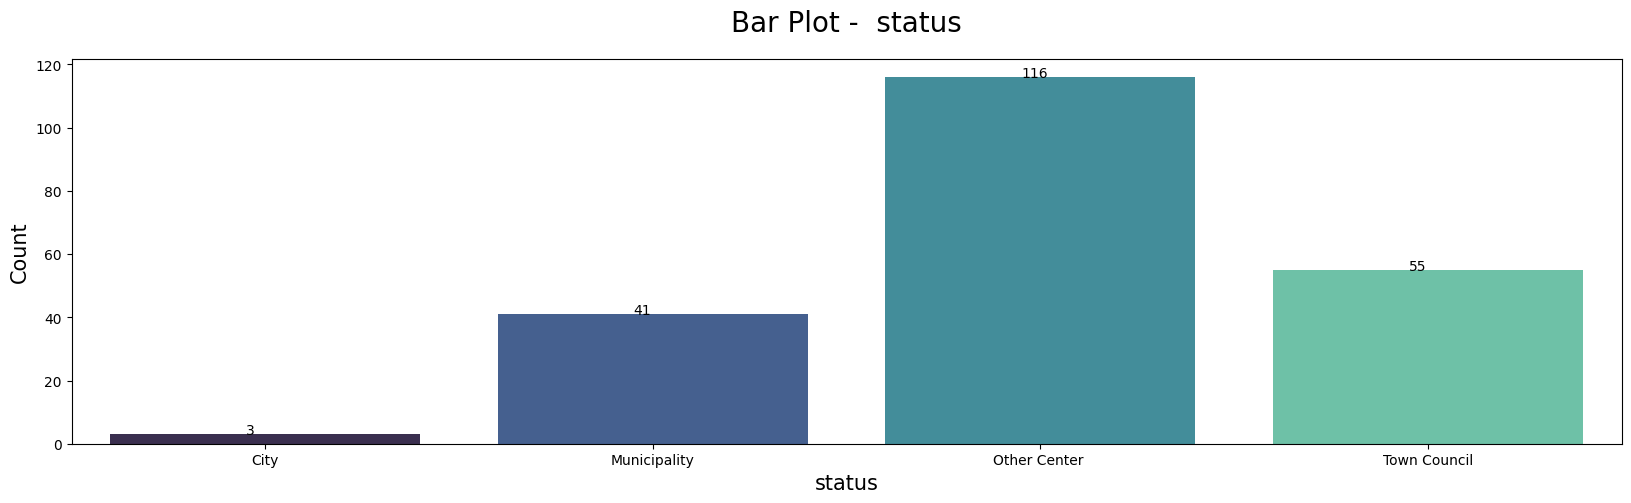

In [283]:
# catplots for urban center
CatPlots('status', 0, df_2)


> The data shows that most of the population don't live in cities, they prefer other centers followed by town councils then we have municipalities in order of preference

Numerical for df_2

In [284]:
# continuous variables for df_2
continuous = df_2.select_dtypes(exclude='object').columns.tolist()
continuous


['core_urban_male_population',
 'core_urban_female_population',
 'total_core_urban_population',
 'peri_urban_male_population',
 'peri_urban_female_population',
 'total_peri_urban_population',
 'rural_male_population',
 'rural_female_population',
 'total_rural_population',
 'total_male_population',
 'total_female_population',
 'total_population']

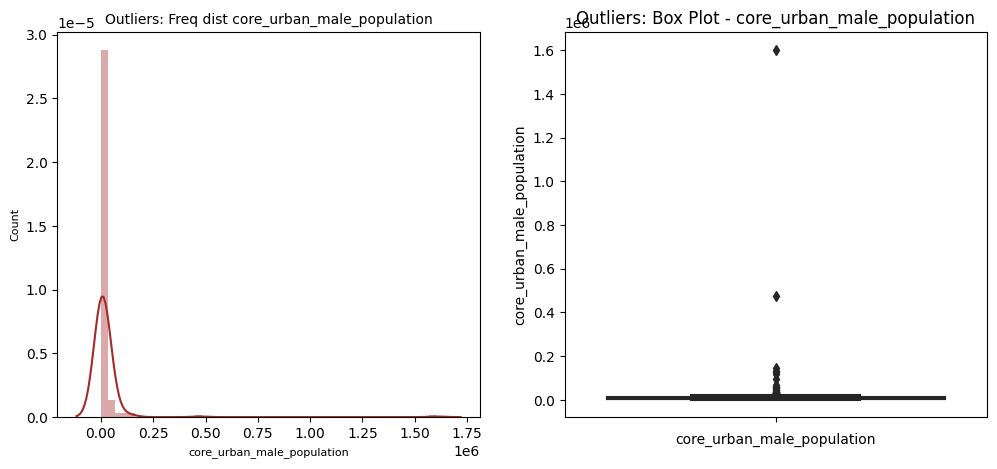

In [287]:
# for core_urban_male_population
NumericalPlots('core_urban_male_population', df_2)

> The data shows that the male population do not prefer living in the core urban areas therefore the data is positively skewed.

> Outliers are caused by male who live in peri urban areas

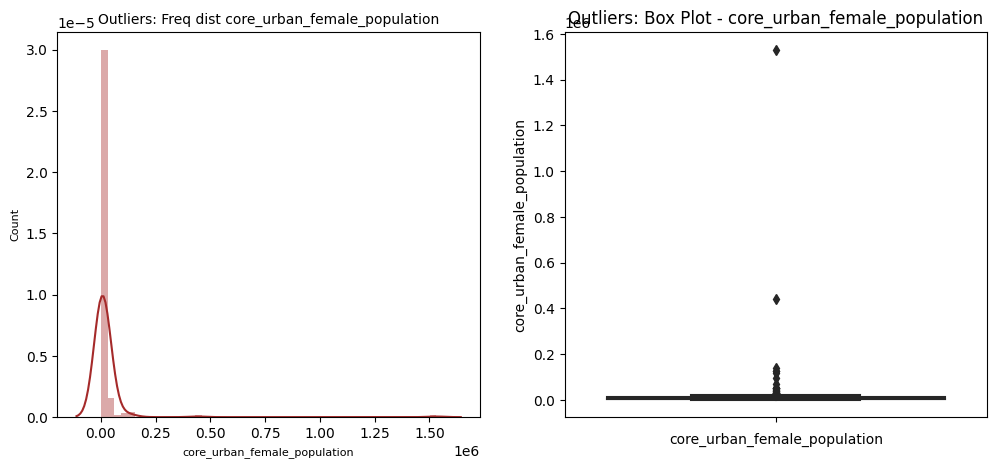

In [288]:
# for core_urban_female_population
NumericalPlots('core_urban_female_population', df_2)

> The skew is positive

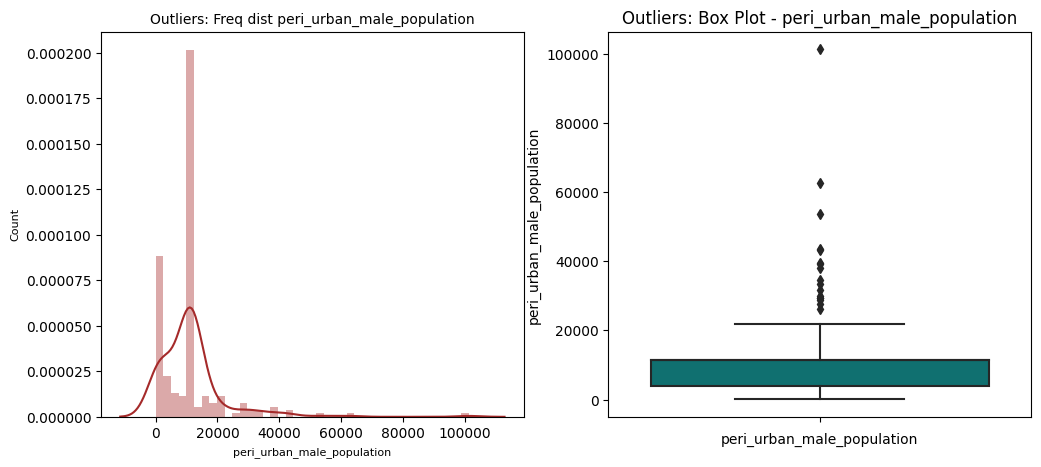

In [289]:
# for total_core_urban_population
NumericalPlots('peri_urban_male_population', df_2)

> The skew is positive

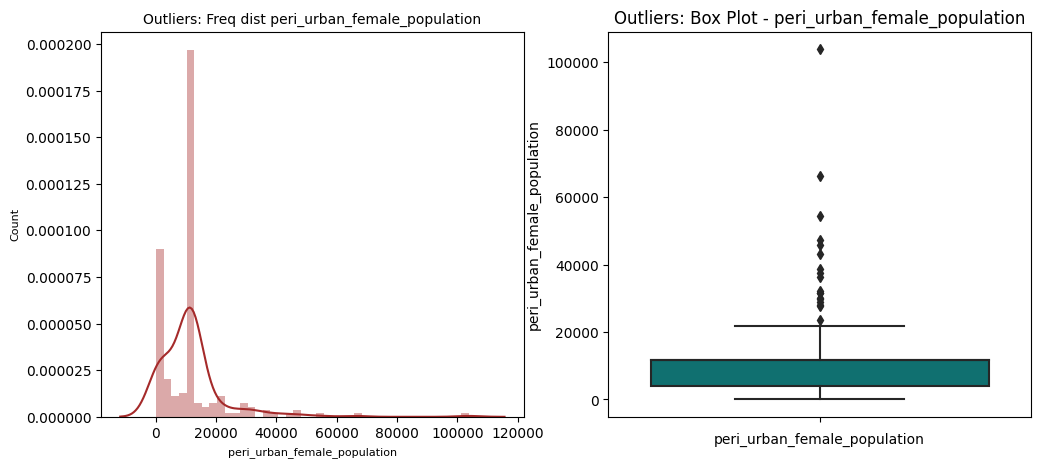

In [290]:
# for total_core_urban_population
NumericalPlots('peri_urban_female_population', df_2)

> the skew is positive

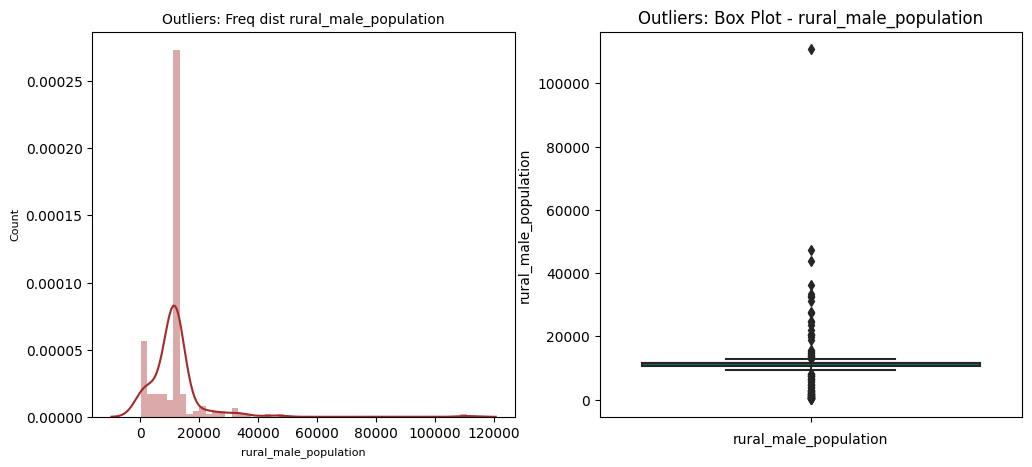

In [291]:
# for rural_male_population
NumericalPlots('rural_male_population', df_2)


> More male prefer living in rural areas

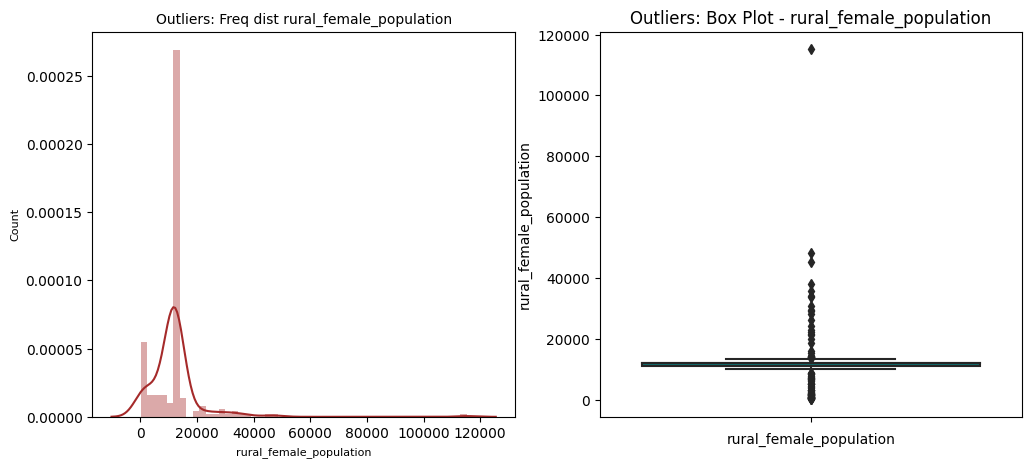

In [292]:
# for rural_female_population
NumericalPlots('rural_female_population', df_2)


> The data for the rural areas for both male and female is positively skewed meaning more people prefer living in rural areas.

Categorical for df_3

In [293]:
# lets see the number of unique values per column for df_3
for col in df_3.columns.tolist():
  print(f'{col}: {len(df_3[col].unique())}')


district: 158
urban/rural: 2
age_years: 82
male: 3798
female: 3819
total: 5696
county: 47
province: 8


In [294]:
# Categorical columns
categorical_ = df_3.select_dtypes(include='object').columns.tolist()
categorical_

['district', 'urban/rural', 'age_years', 'county', 'province']

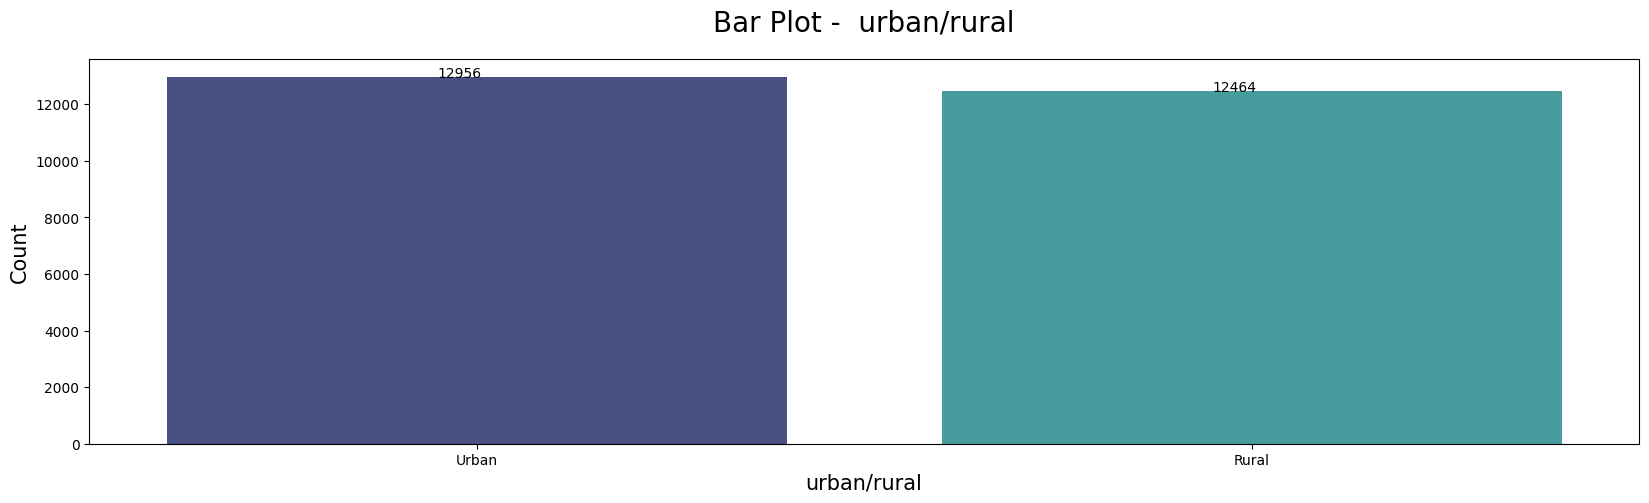

In [295]:
CatPlots('urban/rural',0,df_3)

> It shows that more people prefer living in urban areas

Numerical for df_3

In [296]:
# for continuos columns
continuous_ = df_3.select_dtypes(exclude='object').columns.tolist()
continuous_


['male', 'female', 'total']

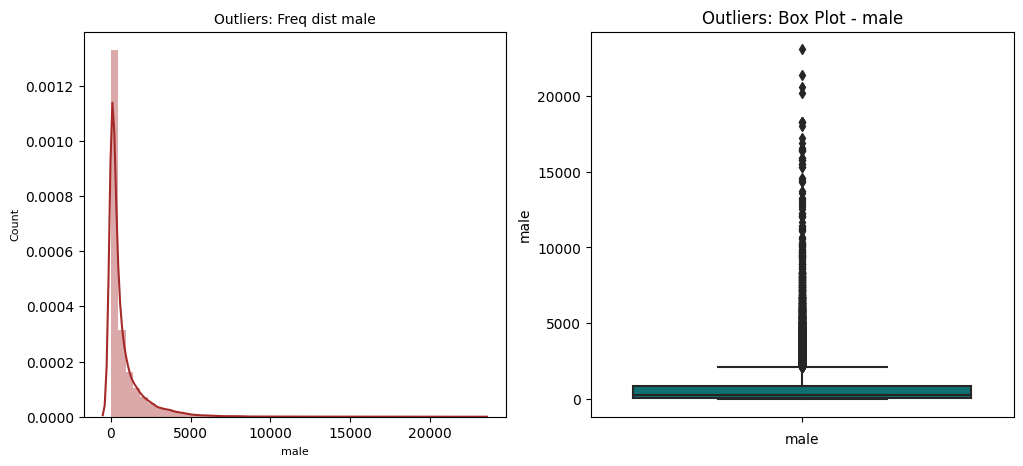

In [297]:
# for the male column
NumericalPlots('male', df_3)

> The skew is positive suggesting more males prefer living in urban areas

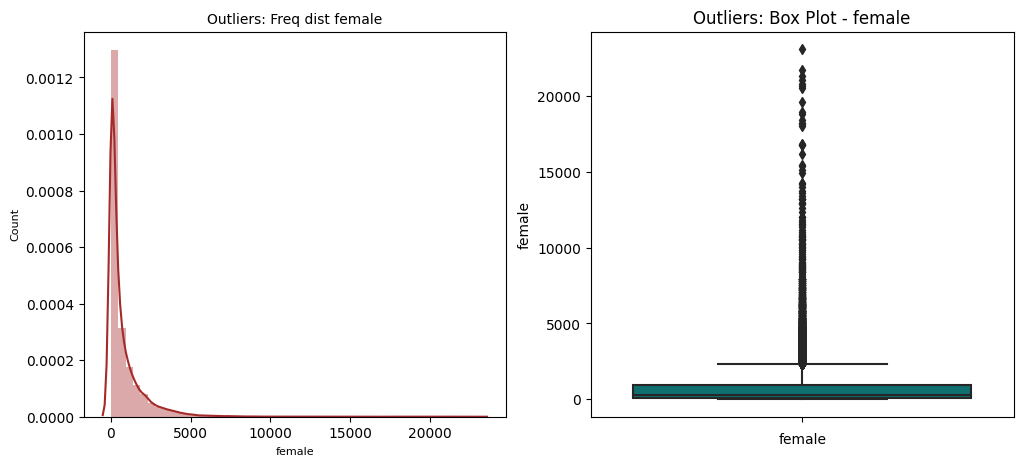

In [298]:
# for female column
NumericalPlots('female', df_3)


> > The skew is positive suggesting more females prefer living in urban areas

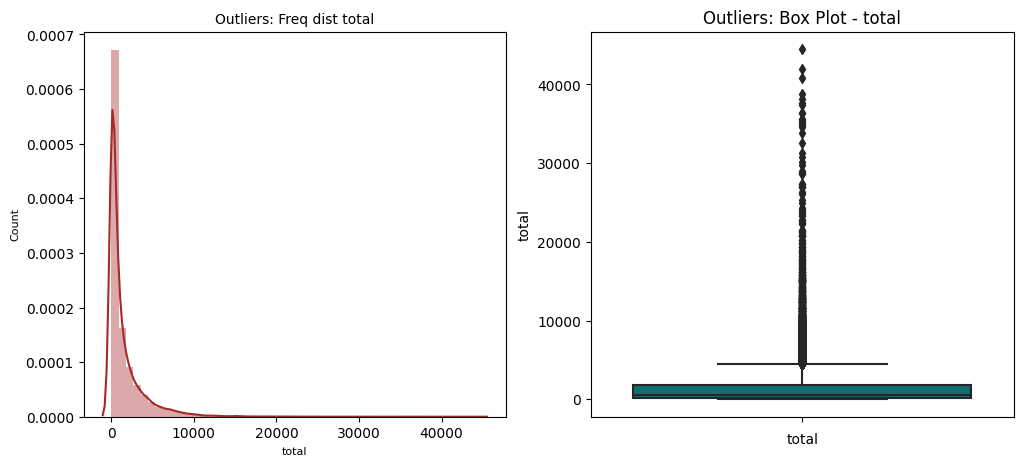

In [299]:
# for total column
NumericalPlots('total', df_3)


> The bulk of the population lives in urban centres, the data is positively skewed.

### B) Bivariate Analysis

Categorical - Categorical for df_2

In [301]:
# Function used to generate a crosstab before plotting a stacked bar chart.
def CrosstabPlot(x, y, rot, color, data):
  table = pd.crosstab(data[x], data[y])
  table.plot.bar(stacked=True, figsize=(30, 5), color=color)
  plt.title(f'{x} Vs {y}', y=1.05, fontsize=12)
  plt.xticks(rotation=rot)
  plt.xlabel(x, fontsize=10)
  plt.ylabel(y, fontsize=10)

In [303]:
# lets see the categorical values for df_2
categorical

['urban_center', 'district', 'status']

Numerical - Numerical for df_2

In [308]:
# Pearson Correlation
def Corr(x, y, data):
  corr = data[[x, y]].corr()
  print(f'Correlation Matrix : \n{corr}')

In [309]:
# Pairplot Function
def PairPlot(data):
  cols = data.columns.values
  plot = sns.pairplot(data)
  plot.fig.set_size_inches(10, 5)
  plot.fig.suptitle(f'Pairplot: {cols[0]} - {cols[1]}', y=1.05)
  # plt.title()
  plt.show()
  print('\nCorrelation\n')
  Corr(cols[0], cols[1], data)


In [311]:
# continuous columns
continuous

['core_urban_male_population',
 'core_urban_female_population',
 'total_core_urban_population',
 'peri_urban_male_population',
 'peri_urban_female_population',
 'total_peri_urban_population',
 'rural_male_population',
 'rural_female_population',
 'total_rural_population',
 'total_male_population',
 'total_female_population',
 'total_population']

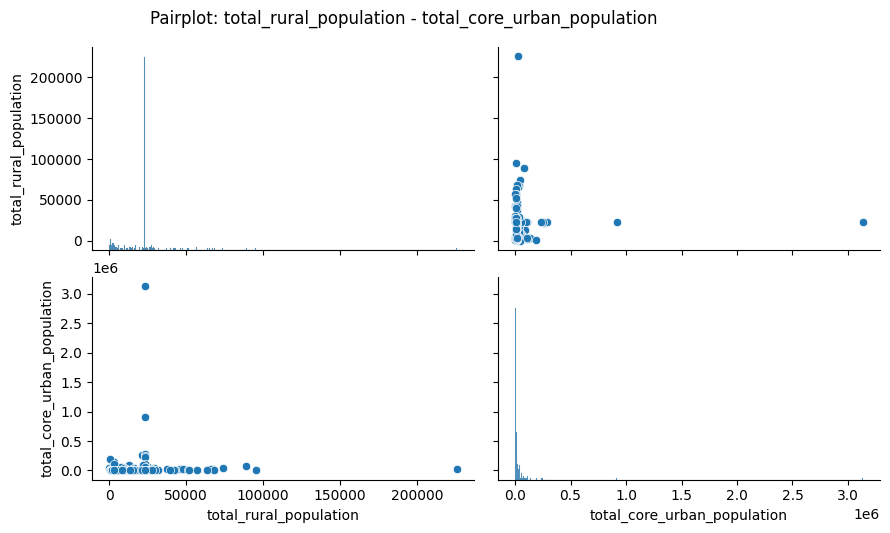


Correlation

Correlation Matrix : 
                             total_rural_population  \
total_rural_population                     1.000000   
total_core_urban_population               -0.007647   

                             total_core_urban_population  
total_rural_population                         -0.007647  
total_core_urban_population                     1.000000  


In [316]:
# Relation between total_rural_population and total_core_urban_population
PairPlot(df_2[['total_rural_population', 'total_core_urban_population']])

> There is a very weak but negative relationship between total_rural_population and total_core_urban_population

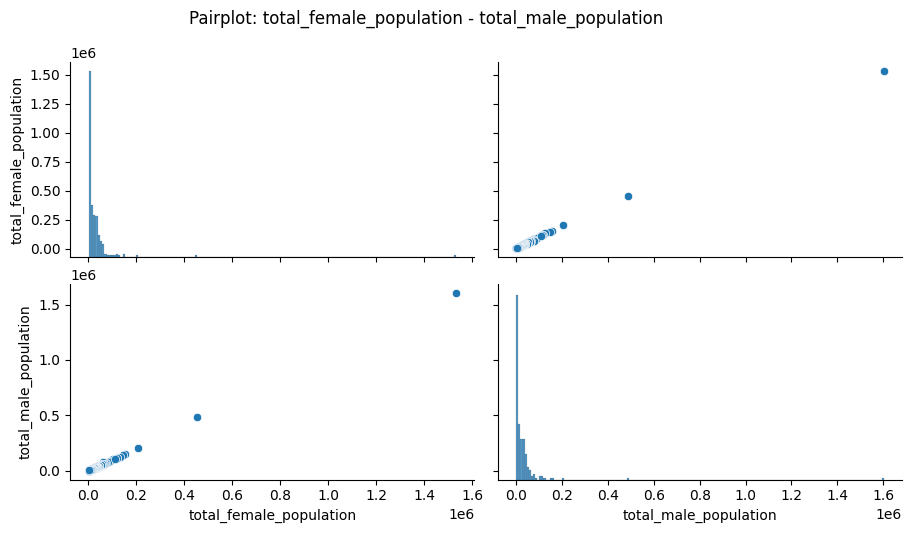


Correlation

Correlation Matrix : 
                         total_female_population  total_male_population
total_female_population                 1.000000               0.999766
total_male_population                   0.999766               1.000000


In [317]:
# Relation between total_female_population and the total_male_population.
PairPlot(df_2[['total_female_population', 'total_male_population']])

> There is a strong and positive relationship between the total_female_population and the total_male_population.


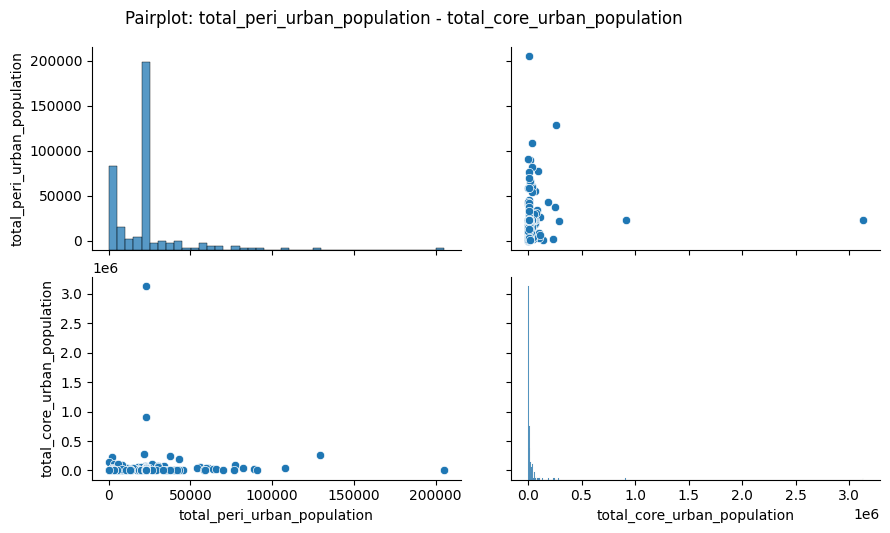


Correlation

Correlation Matrix : 
                             total_peri_urban_population  \
total_peri_urban_population                     1.000000   
total_core_urban_population                     0.029674   

                             total_core_urban_population  
total_peri_urban_population                     0.029674  
total_core_urban_population                     1.000000  


In [318]:
# Relation between total_peri_urban_population and the total_peri_urban_population.
PairPlot(df_2[['total_peri_urban_population', 'total_core_urban_population']])

> There is a very weak but positive relationship between the total_peri_urban_population and the total_peri_urban_population.


Numerical - Categorical for df_2

In [319]:
# Bar plot function
def BarPlotBiv(x, y, rot, data):
  fig, ax = plt.subplots(figsize=(20, 5))
  sns.barplot(data[x], data[y], palette='mako')
  plt.title(f'{x} Distribution by {y}', fontsize=12, y=1.05)
  plt.xticks(rotation=rot)
  for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()),
               (p.get_x()+0.25, p.get_height()+0.01))
  plt.show()


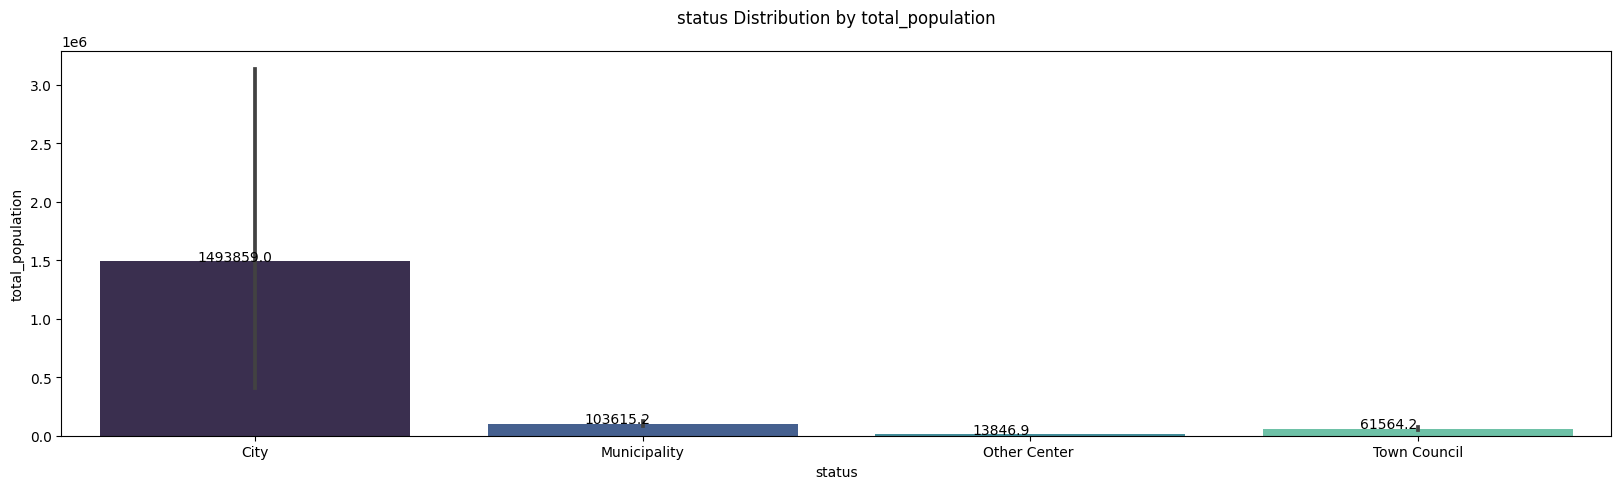

In [321]:
# status and the total_population.
BarPlotBiv('status', 'total_population', 0, df_2)


> Majority of the population lives in the city.

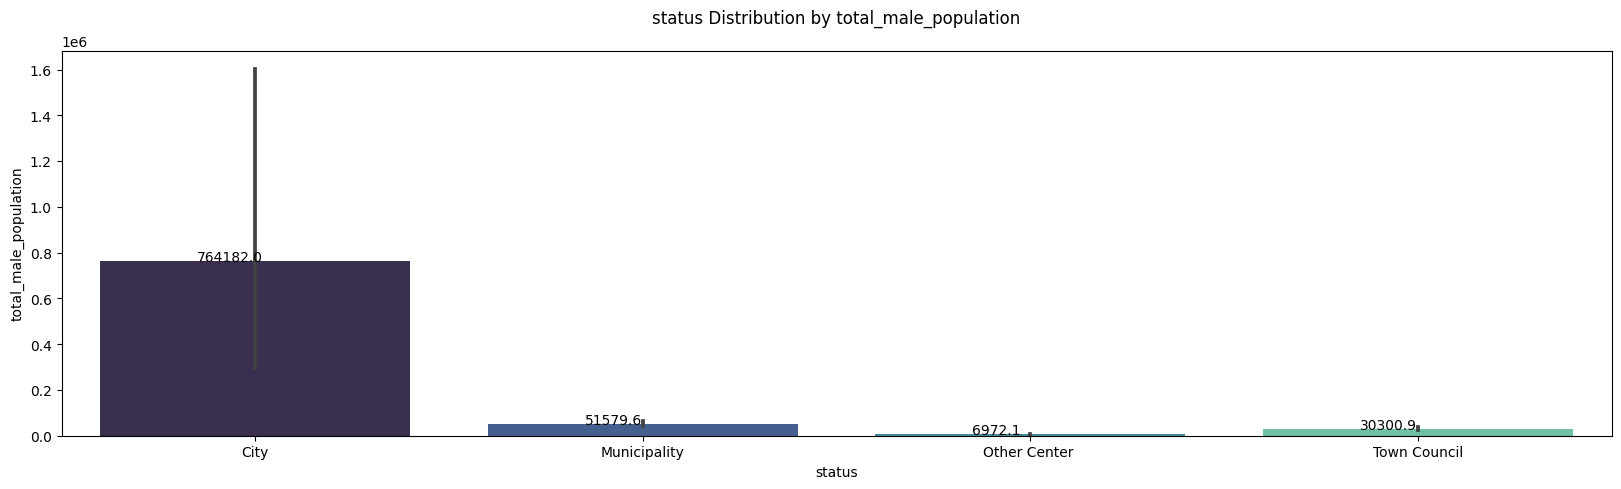

In [322]:
# status and the total_male_population.
BarPlotBiv('status', 'total_male_population', 0, df_2)


> Majority of the males live in the city.

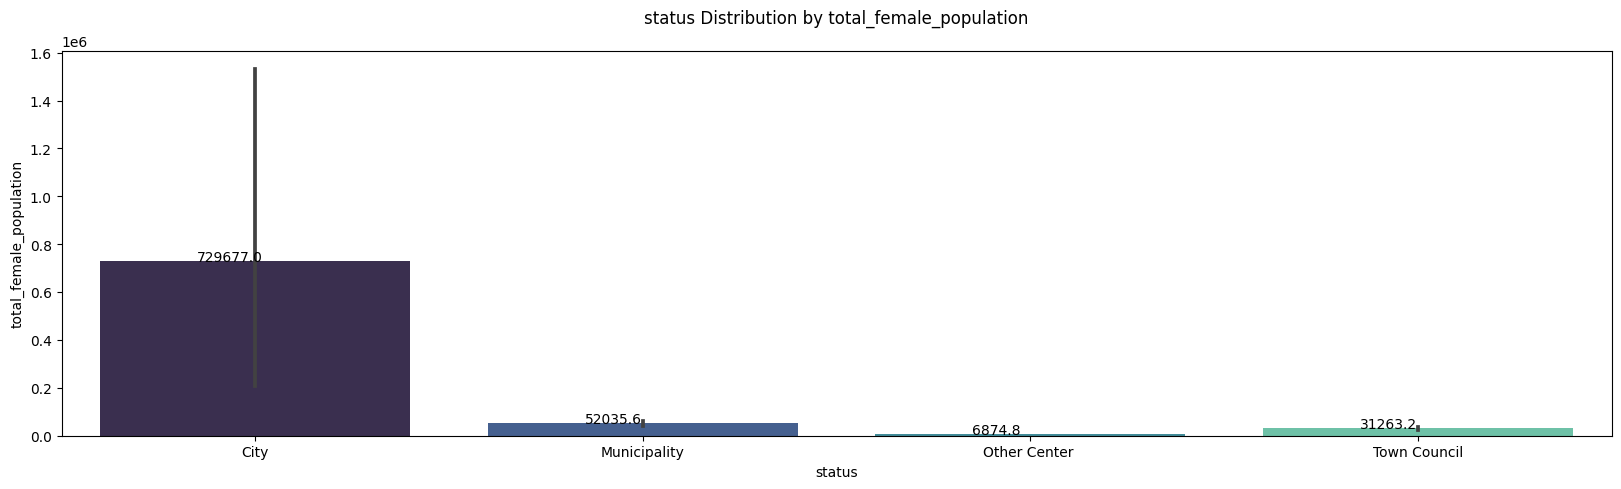

In [323]:
# status and the total_female_population.
BarPlotBiv('status', 'total_female_population', 0, df_2)


> Most of the female population lives in the city

Categorical - Categorical for df_3

In [325]:
# lets see the categorical columns for df_3
categorical_

['district', 'urban/rural', 'age_years', 'county', 'province']

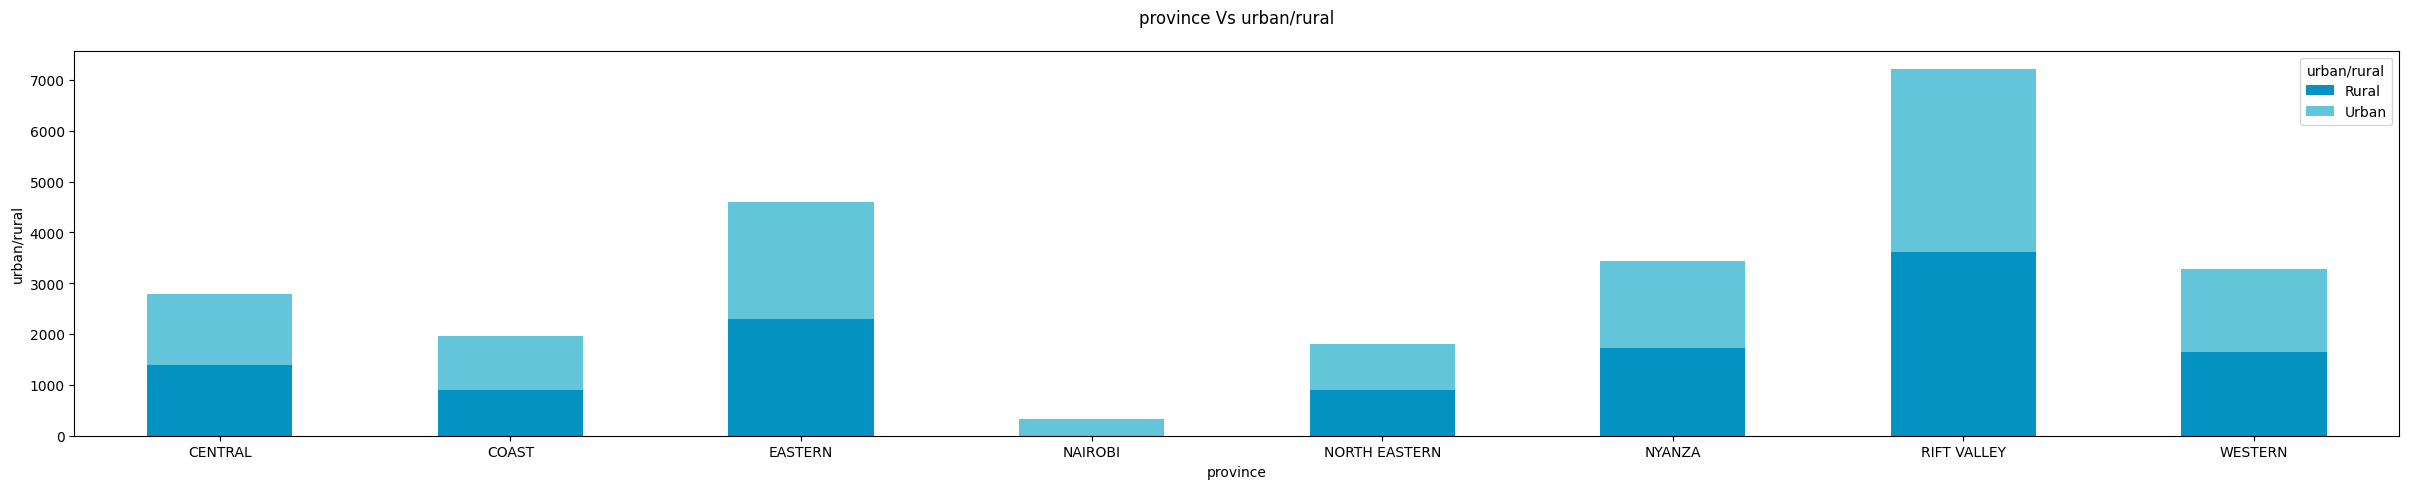

In [329]:
# province depending on urban/rural.
color = ['#0492C2', '#63C5DA']
CrosstabPlot('province', 'urban/rural', 0, color, df_3)


> From the general overview, a majority of people from most provinces reside in the urban areas.

Numerical - Numerical for df_3

In [330]:
# lets see the continuous variables
continuous_

['male', 'female', 'total']

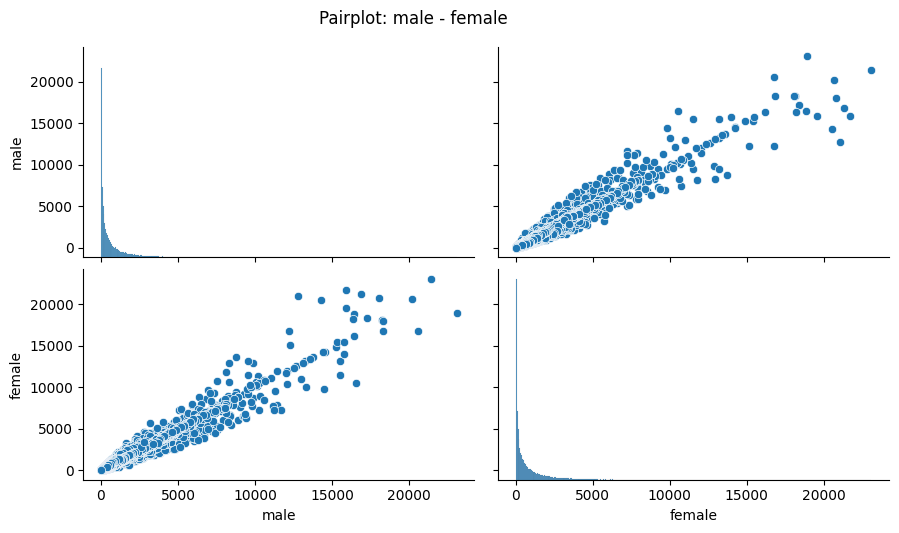


Correlation

Correlation Matrix : 
            male    female
male    1.000000  0.980868
female  0.980868  1.000000


In [332]:
# Relation between male and female
PairPlot(df_3[['male', 'female']])


> There is a strong and positive relationship between the male and female genders in settlements

Numerical - Categorical for df_3

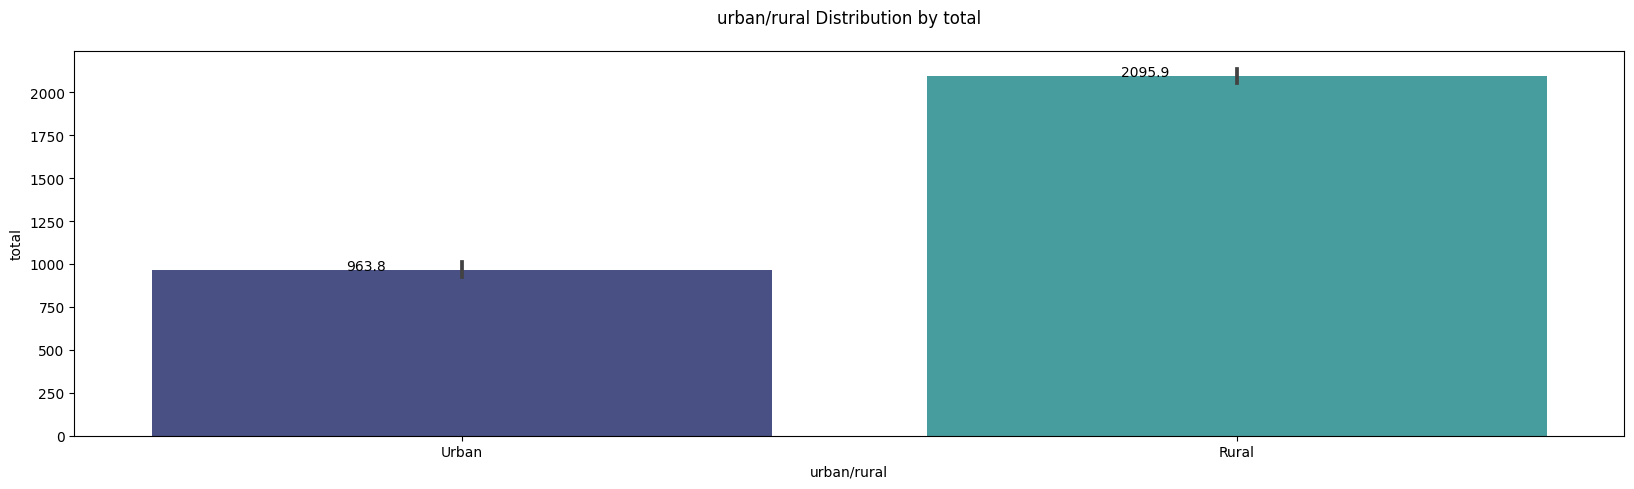

In [333]:
# relationship between gender and total population
BarPlotBiv('urban/rural', 'total', 0, df_3)


> From the data, most people prefer residing in rural areas

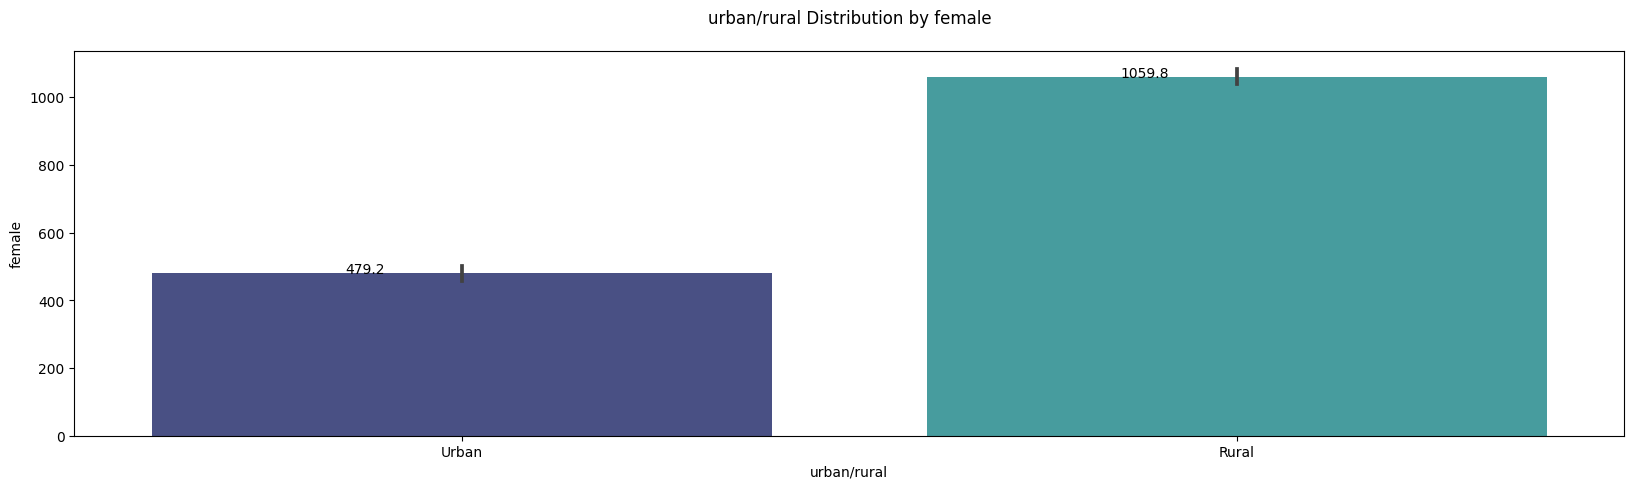

In [335]:
# relationship between gender and female population
BarPlotBiv('urban/rural', 'female', 0, df_3)


> More females reside in rural areas

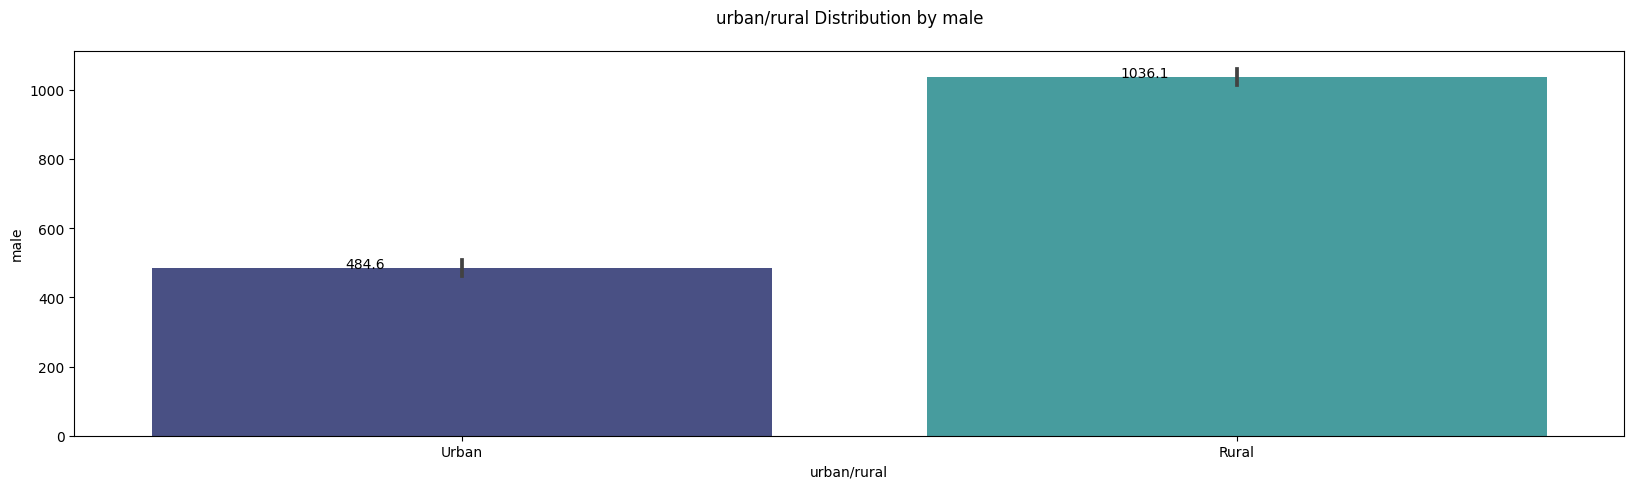

In [338]:
# relationship between gender and female population
BarPlotBiv('urban/rural', 'male', 0, df_3)


> more males reside in rural areas than urban centres but generally females are more in rural areas than urban areas, in general females are more than males

## Analysis Summary

1. The analysis has been thoroughly done, cleaning and understanding the structure has been accomplished.

2. We have made visualizations using several charts indicating trends and showing population differences and trends in rural and urban areas. 

3. There are some noticeable patterns, like younger families preferring to live in urban areas and the number of females being more than the number of males in urban areas, the other dataset however had some anomalies showing people preferring rural areas to urban areas, but that is subject to study from different data sources.

4. Urbanization has affected healthcare and education positively. The rise in the number of young families living in urban areas is an indicator of availability of healthcare and educational needs that meet the requirements of the occupants. 

5. There is a low number of people above the age of 60 living in urban areas. They mostly reside in rural areas. This might be cause for the conflict in observations.

6. From the analysis, major cities such as Nairobi are growing at a faster rate. 

7. Urbanization has presented challenges such as increased environmental pollution, spikes in crime rates alongside other problems, the elderly are also being neglected and sent back to the rural areas which in turn creates an imbalanced growth rate between rural and urban areas.

8. Urbanization presents opportunities for growth in terms of technology and availability of social amenities which improve the quality of life for people living there. 

9. Policy makers should address the issue of youth unemployment which is a problem that comes from urbanization. It reflects positively on the productivity of the country.

### a) Multivariate Analysis

Correlation Heatmap

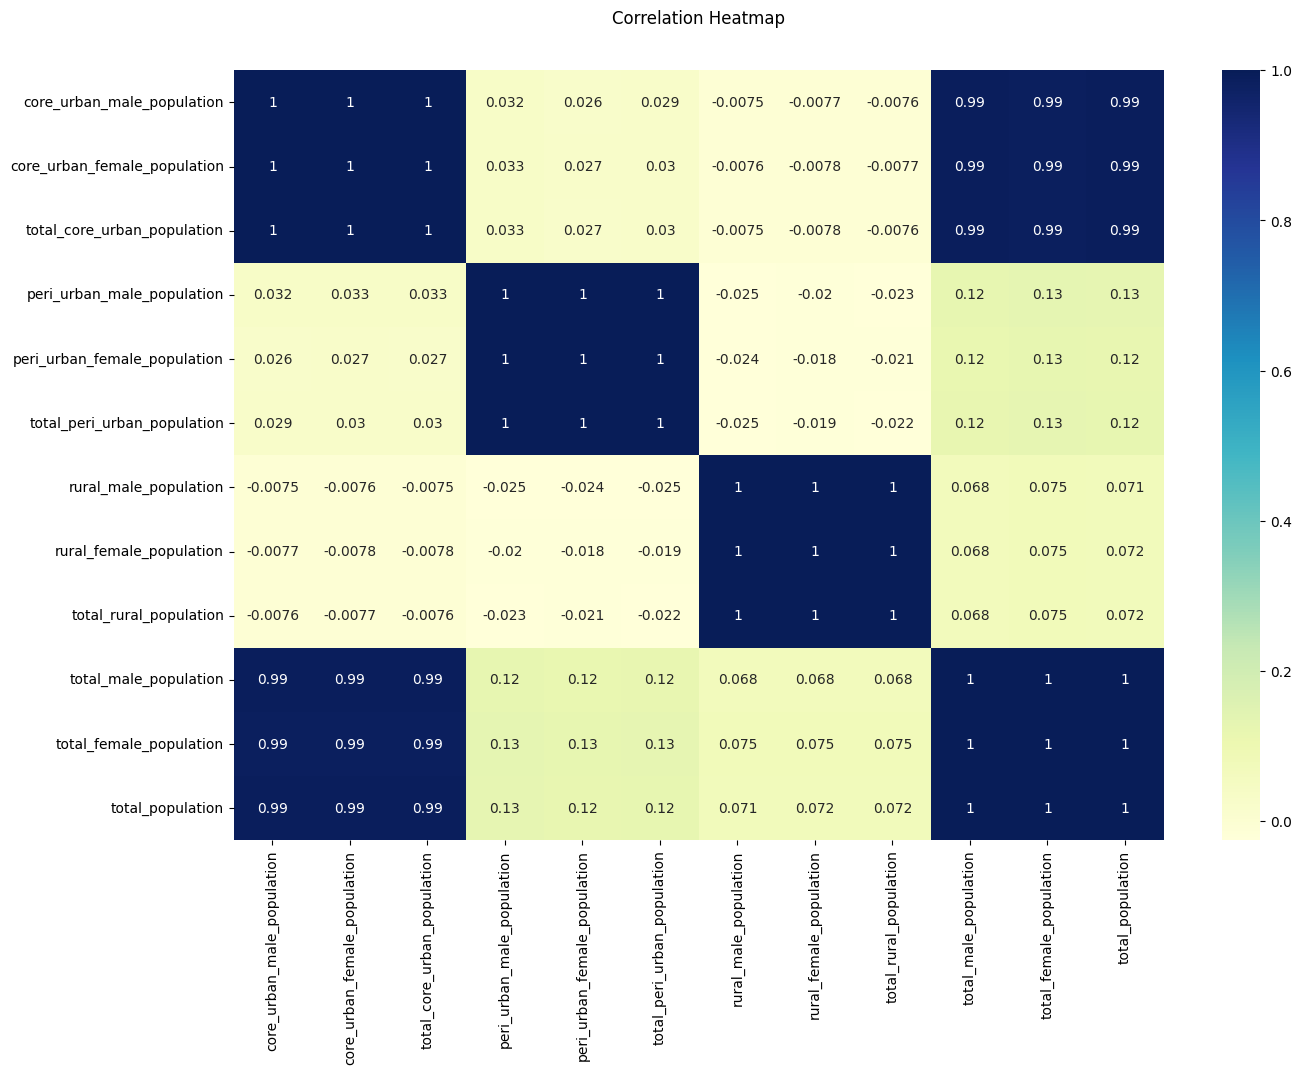

In [339]:
# Checking for high correlation between columns for df_2
fig, ax = plt.subplots(figsize = (15, 10))
sns.heatmap(df_2[continuous].corr(), annot = True, cmap = plt.cm.YlGnBu)
plt.title('Correlation Heatmap', y = 1.05);

> Most column pairs have correlations lower than 0.5, therefore the columns have weak to very weak correlations with each other, some have values higher than 0.5 thus strong to strong correlations



Text(0.5, 1.05, 'Correlation Heatmap')

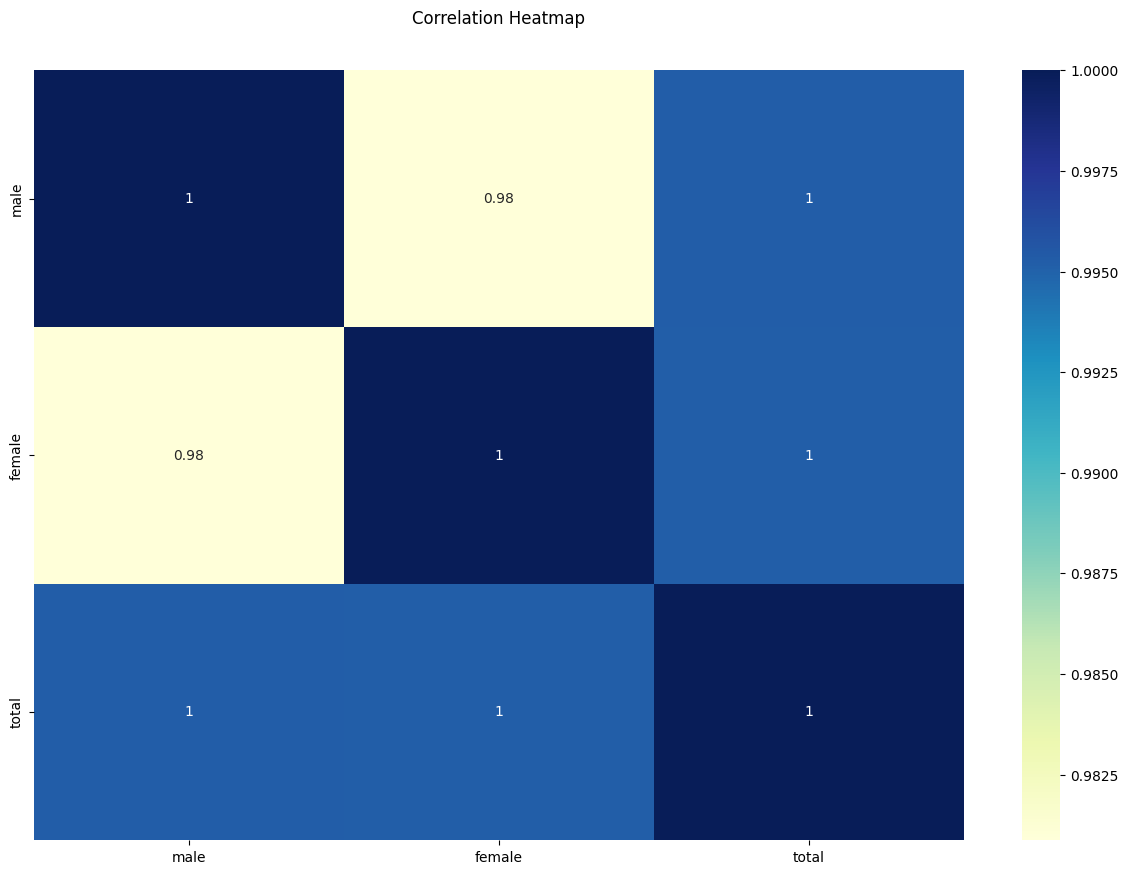

In [347]:
# Checking for high correlation between columns for df_3
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(df_3[continuous_].corr(), annot=True, cmap=plt.cm.YlGnBu)
plt.title('Correlation Heatmap', y=1.05)


> Most column pairs have values higher than 0.5 thus strong to strong correlations

